Hegselmann-Krause model
---


Simulation
---

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import trange

In [42]:
N=10
steps=20
E=0.5

In [43]:
matrix=np.zeros([N,steps])

In [44]:
matrix[:,0]=np.random.uniform(0, 1, size=N)

In [45]:
for b in range(1, steps):
    matrix[:, b] = np.copy(matrix[:, b - 1])
    vl = np.random.randint(N)
    summation = 0
    comp = 0
    for a in range(0, N - 1):
        value = matrix[a, b - 1]
        if np.abs(matrix[vl, b] - value) < E:
            summation += value
            comp += 1
    if comp != 0:
        for a in range(0, N - 1):
            value = matrix[a, b - 1]
            if np.abs(matrix[vl, b] - value) < E:
                matrix[a, b] = (matrix[a, b - 1] * summation) / comp
    else:
        matrix[:, b] = matrix[:, b - 1]  # Copy values from the previous column

print(matrix)


[[3.75328337e-001 2.09203243e-001 5.90867599e-002 4.71339353e-003
  2.99930585e-005 1.21449256e-009 1.99132923e-018 1.99132923e-018
  5.35352072e-036 3.86929932e-071 2.02124056e-141 5.51555679e-282
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [2.33461385e-001 1.30128408e-001 3.67530918e-002 2.93182069e-003
  1.86562545e-005 7.55437540e-010 1.23864477e-018 1.23864477e-018
  3.32999201e-036 2.40677799e-071 1.25725019e-141 3.43078153e-282
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [2.96254206e-001 1.65128328e-001 4.66383681e-002 3.72037632e-003
  2.36741243e-005 9.58623407e-010 1.57179622e-018 1.57179622e-018
  4.22564159e-036 3.05411578e-071 1.59540583e-141 4.35353992e-282
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [8.708

In [38]:
for b in range(1,steps):
    matrix[:,b]=np.copy(matrix[:,(b-1)])
    vl=np.random.randint(N)
    sum=0
    comp=0
    for a in range(0,N-1):
        value=matrix[:,(b-1)][a]
        if np.abs(matrix[:,b][vl]-value)<E:
            sum+=value
            comp+=1
        else:
            pass
        try:
            matrix[:,b][a]=(matrix[:,(b-1)][a]*sum)/comp
        except:
            pass
matrix

[[2.79985453e-01 7.89599327e-02 7.89599327e-02 7.89599327e-02
  7.89599327e-02 6.27985149e-03 6.27985149e-03 6.27985149e-03
  6.27985149e-03 6.27985149e-03 5.69242922e-05 2.30807323e-09
  2.30807323e-09 2.30807323e-09 3.79449051e-18 3.79449051e-18
  3.79449051e-18 3.79449051e-18 2.52043460e-21 2.52043460e-21]
 [2.74195420e-01 7.73270600e-02 7.73270600e-02 7.73270600e-02
  7.73270600e-02 6.14998565e-03 6.14998565e-03 6.14998565e-03
  6.14998565e-03 6.14998565e-03 5.57471114e-05 2.26034282e-09
  2.26034282e-09 2.26034282e-09 3.71602135e-18 3.71602135e-18
  3.71602135e-18 3.71602135e-18 2.46831261e-21 2.46831261e-21]
 [6.22953518e-01 6.22953518e-01 3.88749927e-01 3.88749927e-01
  1.51126506e-01 1.51126506e-01 1.51126506e-01 2.28392207e-02
  2.28392207e-02 2.28392207e-02 2.28392207e-02 2.28392207e-02
  2.28392207e-02 2.28392207e-02 2.28392207e-02 2.28392207e-02
  2.28392207e-02 2.28392207e-02 2.28392207e-02 2.28392207e-02]
 [6.87875979e-01 6.87875979e-01 6.87875979e-01 4.76483366e-01
  4.7

In [46]:
tiempos = np.transpose([[i]*N for i in range(steps)])

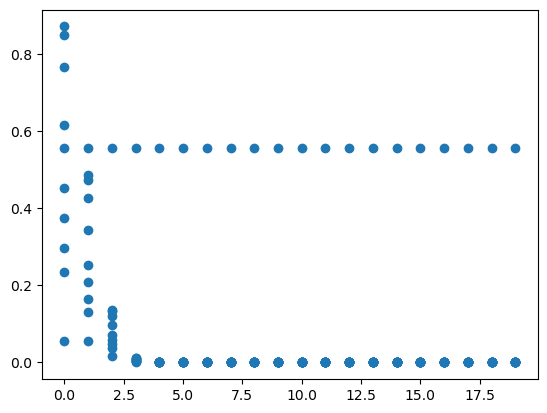

In [47]:
plt.scatter(tiempos,matrix)

In [5]:
matrix[:,1]=np.copy(matrix[:,0])
vl=np.random.randint(N)
sum=0
comp=0
for a in range(0,N-1):
    value=matrix[:,0][a]
    if np.abs(matrix[:,1][vl]-value)<E:
        sum+=value
        comp+=1
    else:
        pass
    matrix[:,1][a]=(matrix[:,0][a]*sum)/comp

In [13]:
matrix[50]

array([6.59337786e-001, 2.50280162e-001, 4.42693476e-002, 1.38751800e-003,
       1.37114639e-006, 1.34973944e-012, 1.31818019e-024, 1.26232526e-048,
       1.14416104e-096, 8.95894706e-193, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [19]:
################################################## 1-D ##################################################
def model1D(N,steps,seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    seed : random seed
    '''
    start=time.time()
    path='./Simulation/1D'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'The system size is: '+str(N)+'\n')
        file.write('There were '+str(steps)+' timesteps'+'\n')
        file.write( 'The random seed used was: '+str(seed)+'\n')
    np.random.seed(seed)
    Ci=np.random.choice([0, 1],N)
    B=np.copy(Ci)
    M=np.zeros(steps)
    for i in trange(0,steps):
        M[i]=np.sum(B)
        if np.sum(B)/N == 1 or np.sum(B)/N == 0:
            break
        a1 = np.random.randint(N)
        a2 = (a1+1)%N
        a0=(a1-1)%N
        a3=(a2+1)%N
        if B[a1]*B[a2]==1:
            B[a0]=B[a1]
            B[a3]=B[a1]
        if B[a1]*B[a2]==0:
            B[a0]=B[a2]
            B[a3]=B[a1]
        else:
            pass
    M = M[:i+1]
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("This simulation took : "+str(end-start)+ " seconds")


In [20]:
########################################### 3-D, takes 2 agents ###########################################
def model2D(N,steps,seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    seed : random seed
    '''
    start=time.time()
    path='./Simulation/2D'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'The system size is: '+str(N)+'\n')
        file.write('There were '+str(steps)+' timesteps'+'\n')
        file.write( 'The random seed used was: '+str(seed)+'\n')
    np.random.seed(seed)
    Ci=np.random.choice([0, 1],[N,N])
    B=np.copy(Ci)
    M=np.zeros(steps)
    for l in trange(0,steps):
        M[l]=np.sum(B)
        if np.sum(B)/N**2 == 1 or np.sum(B)/N**2 == 0:
            break
        i,j=np.random.randint(N),np.random.randint(N)
        a1 = B[i,j]
        i2 = np.random.choice([0,1,-1])
        if i2 == 0:
            j2=np.random.choice([-1,1])
        else:
            j2 = 0
        a2=B[(i+i2)%N, (j+j2)%N]
        if a1==a2:
            if j2==0 and i2==1:
                B[i,(j-1)%N]=B[(i-1)%N,j]=B[i,(j+1)%N]=B[i2,(j2-1)%N]=B[(i2+1)%N,j2]=B[i2,(j2+1)%N]=a1
            if j2==0 and i2==-1:
                B[i2,(j2-1)%N]=B[(i2-1)%N,j2]=B[i2,(j2+1)%N]=B[i,(j-1)%N]=B[(i+1)%N,j]=B[i,(j+1)%N]=a1
            if j2==1:
                B[i,(j-1)%N]=B[(i-1)%N,j]= B[(i+1)%N,j]=B[(i2-1)%N,j2]= B[(i2+1)%N,j2]= B[i2,(j2+1)%N]=a1
            if j2==-1:
                B[i2,(j2-1)%N]=B[(i2-1)%N,j2]=B[(i2+1)%N,j2]=B[(i-1)%N,j]=B[(i+1)%N,j]=B[i,(j+1)%N]=a1
        else:
            pass
    M = M[:l+1]
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("This simulation took : "+str(end-start)+ " seconds")
    return Ci,B,M

In [21]:
def plotter(model,N,steps,seed):
    if model==model1D:
        Ci,B,M=model1D(N,steps,seed)
        path='./Simulation/1D'
        Ci,B,M=model1D(N,steps,seed)
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))   ##Crea la figura de resumen
        axes[0].imshow(np.expand_dims(Ci, axis=0), cmap='Greys',vmin=0, vmax=1)
        axes[0].set_title('Initial Configuration')
        axes[1].imshow(np.expand_dims(B, axis=0), cmap='Greys',vmin=0, vmax=1)
        axes[1].set_title('Final State') 
        axes[2].plot(M/N)
        axes[2].set_ylim(0,1.1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consensus")
        axes[2].set_title("consensus vs time")
        plt.savefig(path+'/Summary.png')
    if model==model2D:
        path='./Simulation/2D'
        Ci,B,M=model2D(N,steps,seed)
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))   ##Crea la figura de resumen
        axes[0].imshow(Ci, cmap='Greys', vmin=0, vmax=1)
        axes[0].set_title('Estado Inicial')
        axes[1].imshow(B, cmap='Greys', vmin=0, vmax=1)
        axes[1].set_title('Estado Final')  
        axes[2].plot(M/N**2)
        axes[2].set_ylim(0,1.1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consensus")
        axes[2].set_title("consensus vs time")
        plt.savefig(path+'/Summary.png')

In [ ]:
plotter(model2D,100,100000,8)

  2%|▏         | 2498/100000 [00:00<00:17, 5497.88it/s]

 67%|██████▋   | 66928/100000 [00:10<00:04, 7145.15it/s]

 77%|███████▋  | 76648/100000 [00:12<00:04, 5112.78it/s]